In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import json

In [46]:
df = pd.read_csv('projections-espn.csv')

In [47]:
df.head(5)

,week,rush_yards,receptions,name,pass_attempts,season,pass_yards,game_result,projected_pts,pass_TD,receiving_TD,player_id,receiving_yards,rush_attempts,pass_completions,rush_TD,interceptions,opponent
0,1,3,0,Peyton Manning,40,2014,337,W 31-24,27,4,0,1428,0,2,27,0,1,Ind
1,1,114,3,LeSean McCoy,0,2014,0,W 34-17,26,0,0,12514,32,24,0,2,0,Jac
2,1,4,0,Drew Brees,38,2014,315,L 34-37,24,3,0,2580,0,2,28,0,0,@Atl
3,1,84,6,Jamaal Charles,0,2014,0,L 10-26,24,0,0,11307,47,17,0,2,0,Ten
4,1,84,3,Adrian Peterson,0,2014,0,W 34-6,22,0,0,10452,22,18,0,2,0,@StL


In [48]:
def ranker(df): 
    """Used for getting the best scoring players at a given position and week"""
    df.sort_values('projected_pts', inplace=True, ascending=False)
    df['position_rank'] = np.arange(len(df)) + 1
    return df

In [49]:
ranker(df)

,week,rush_yards,receptions,name,pass_attempts,season,pass_yards,game_result,projected_pts,pass_TD,receiving_TD,player_id,receiving_yards,rush_attempts,pass_completions,rush_TD,interceptions,opponent,position_rank
337,2,-1,0,Peyton Manning,44,2014,352,W 24-17,28,4,0,1428,0,2,28,0,1,KC,1
1627,6,-2,0,Peyton Manning,40,2014,318,W 31-17,28,4,0,1428,0,2,27,0,0,@NYJ,2
0,1,3,0,Peyton Manning,40,2014,337,W 31-24,27,4,0,1428,0,2,27,0,1,Ind,3
2270,8,77,0,Russell Wilson,30,2014,213,W 13-9,27,2,0,14881,0,7,22,1,1,@Car,4
2883,10,1,0,Ben Roethlisberger,35,2014,282,L 13-20,27,4,0,5536,0,2,24,0,0,@NYJ,5
1,1,114,3,LeSean McCoy,0,2014,0,W 34-17,26,0,0,12514,32,24,0,2,0,Jac,6
3808,13,23,0,Andrew Luck,39,2014,312,W 49-27,26,3,0,14874,0,6,25,0,0,Wsh,7
1021,4,22,0,Philip Rivers,36,2014,305,W 33-14,26,3,0,5529,0,6,26,0,0,Jac,8
4488,15,21,0,Andrew Luck,46,2014,346,W 17-10,25,3,0,14874,0,6,28,0,1,Hou,9
683,3,23,0,Andrew Luck,41,2014,281,W 44-17,25,2,0,14874,0,6,26,1,1,@Jac,10


In [51]:
def bootstrap(data, statfunction=np.mean):
    """Returns a series of 10,000 bootstrapped values with the given statfunction applied"""
    np.random.seed(42)
    samples = pd.DataFrame(np.random.choice(data, size=(10000, len(data)), replace=True))
    return samples.apply(statfunction, axis=1)

In [52]:
def run_player_bootstraps(df):
    """
    Runs the bootstrap function for every player in the given DataFrame.
    Returns
    -------
    {
        Peyton Manning: {
            points: { mean: [], median: [] },
            relative: { mean: [], median: [] }
        }, 
        Matt Forte: {
            points: { mean: [], median: [] },
            relative: { mean: [], median: [] }
        } ...
    }
    """
    players = {}
    for player in df.name.unique().tolist():
        print('Bootstrapping for {}'.format(player))
        cond = df.name == player
        players[player] = {
            'points': {
                'mean': bootstrap(df[cond].point_diff).tolist(),
                'median': bootstrap(df[cond].point_diff, np.median).tolist()
            },
            'relative': {
                'mean': bootstrap(df[cond].relative_diff).tolist(),
                'median': bootstrap(df[cond].relative_diff, np.median).tolist()
            }
        }
    return players    

In [53]:
run_player_bootstraps(df)

Bootstrapping for Peyton Manning


AttributeError: 'DataFrame' object has no attribute 'point_diff'

In [45]:
df.columns

Index(['week', 'rush_yards', 'receptions', 'name', 'pass_attempts', 'season',
       'pass_yards', 'game_result', 'projected_pts', 'pass_TD', 'receiving_TD',
       'player_id', 'receiving_yards', 'rush_attempts', 'pass_completions',
       'rush_TD', 'interceptions', 'opponent', 'position_rank'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 337 to 4826
Data columns (total 19 columns):
week                4827 non-null int64
rush_yards          4827 non-null int64
receptions          4827 non-null int64
name                4827 non-null object
pass_attempts       4827 non-null int64
season              4827 non-null int64
pass_yards          4827 non-null int64
game_result         4827 non-null object
projected_pts       4827 non-null int64
pass_TD             4827 non-null int64
receiving_TD        4827 non-null int64
player_id           4827 non-null int64
receiving_yards     4827 non-null int64
rush_attempts       4827 non-null int64
pass_completions    4827 non-null int64
rush_TD             4827 non-null int64
interceptions       4827 non-null int64
opponent            4827 non-null object
position_rank       4827 non-null int64
dtypes: int64(16), object(3)
memory usage: 754.2+ KB


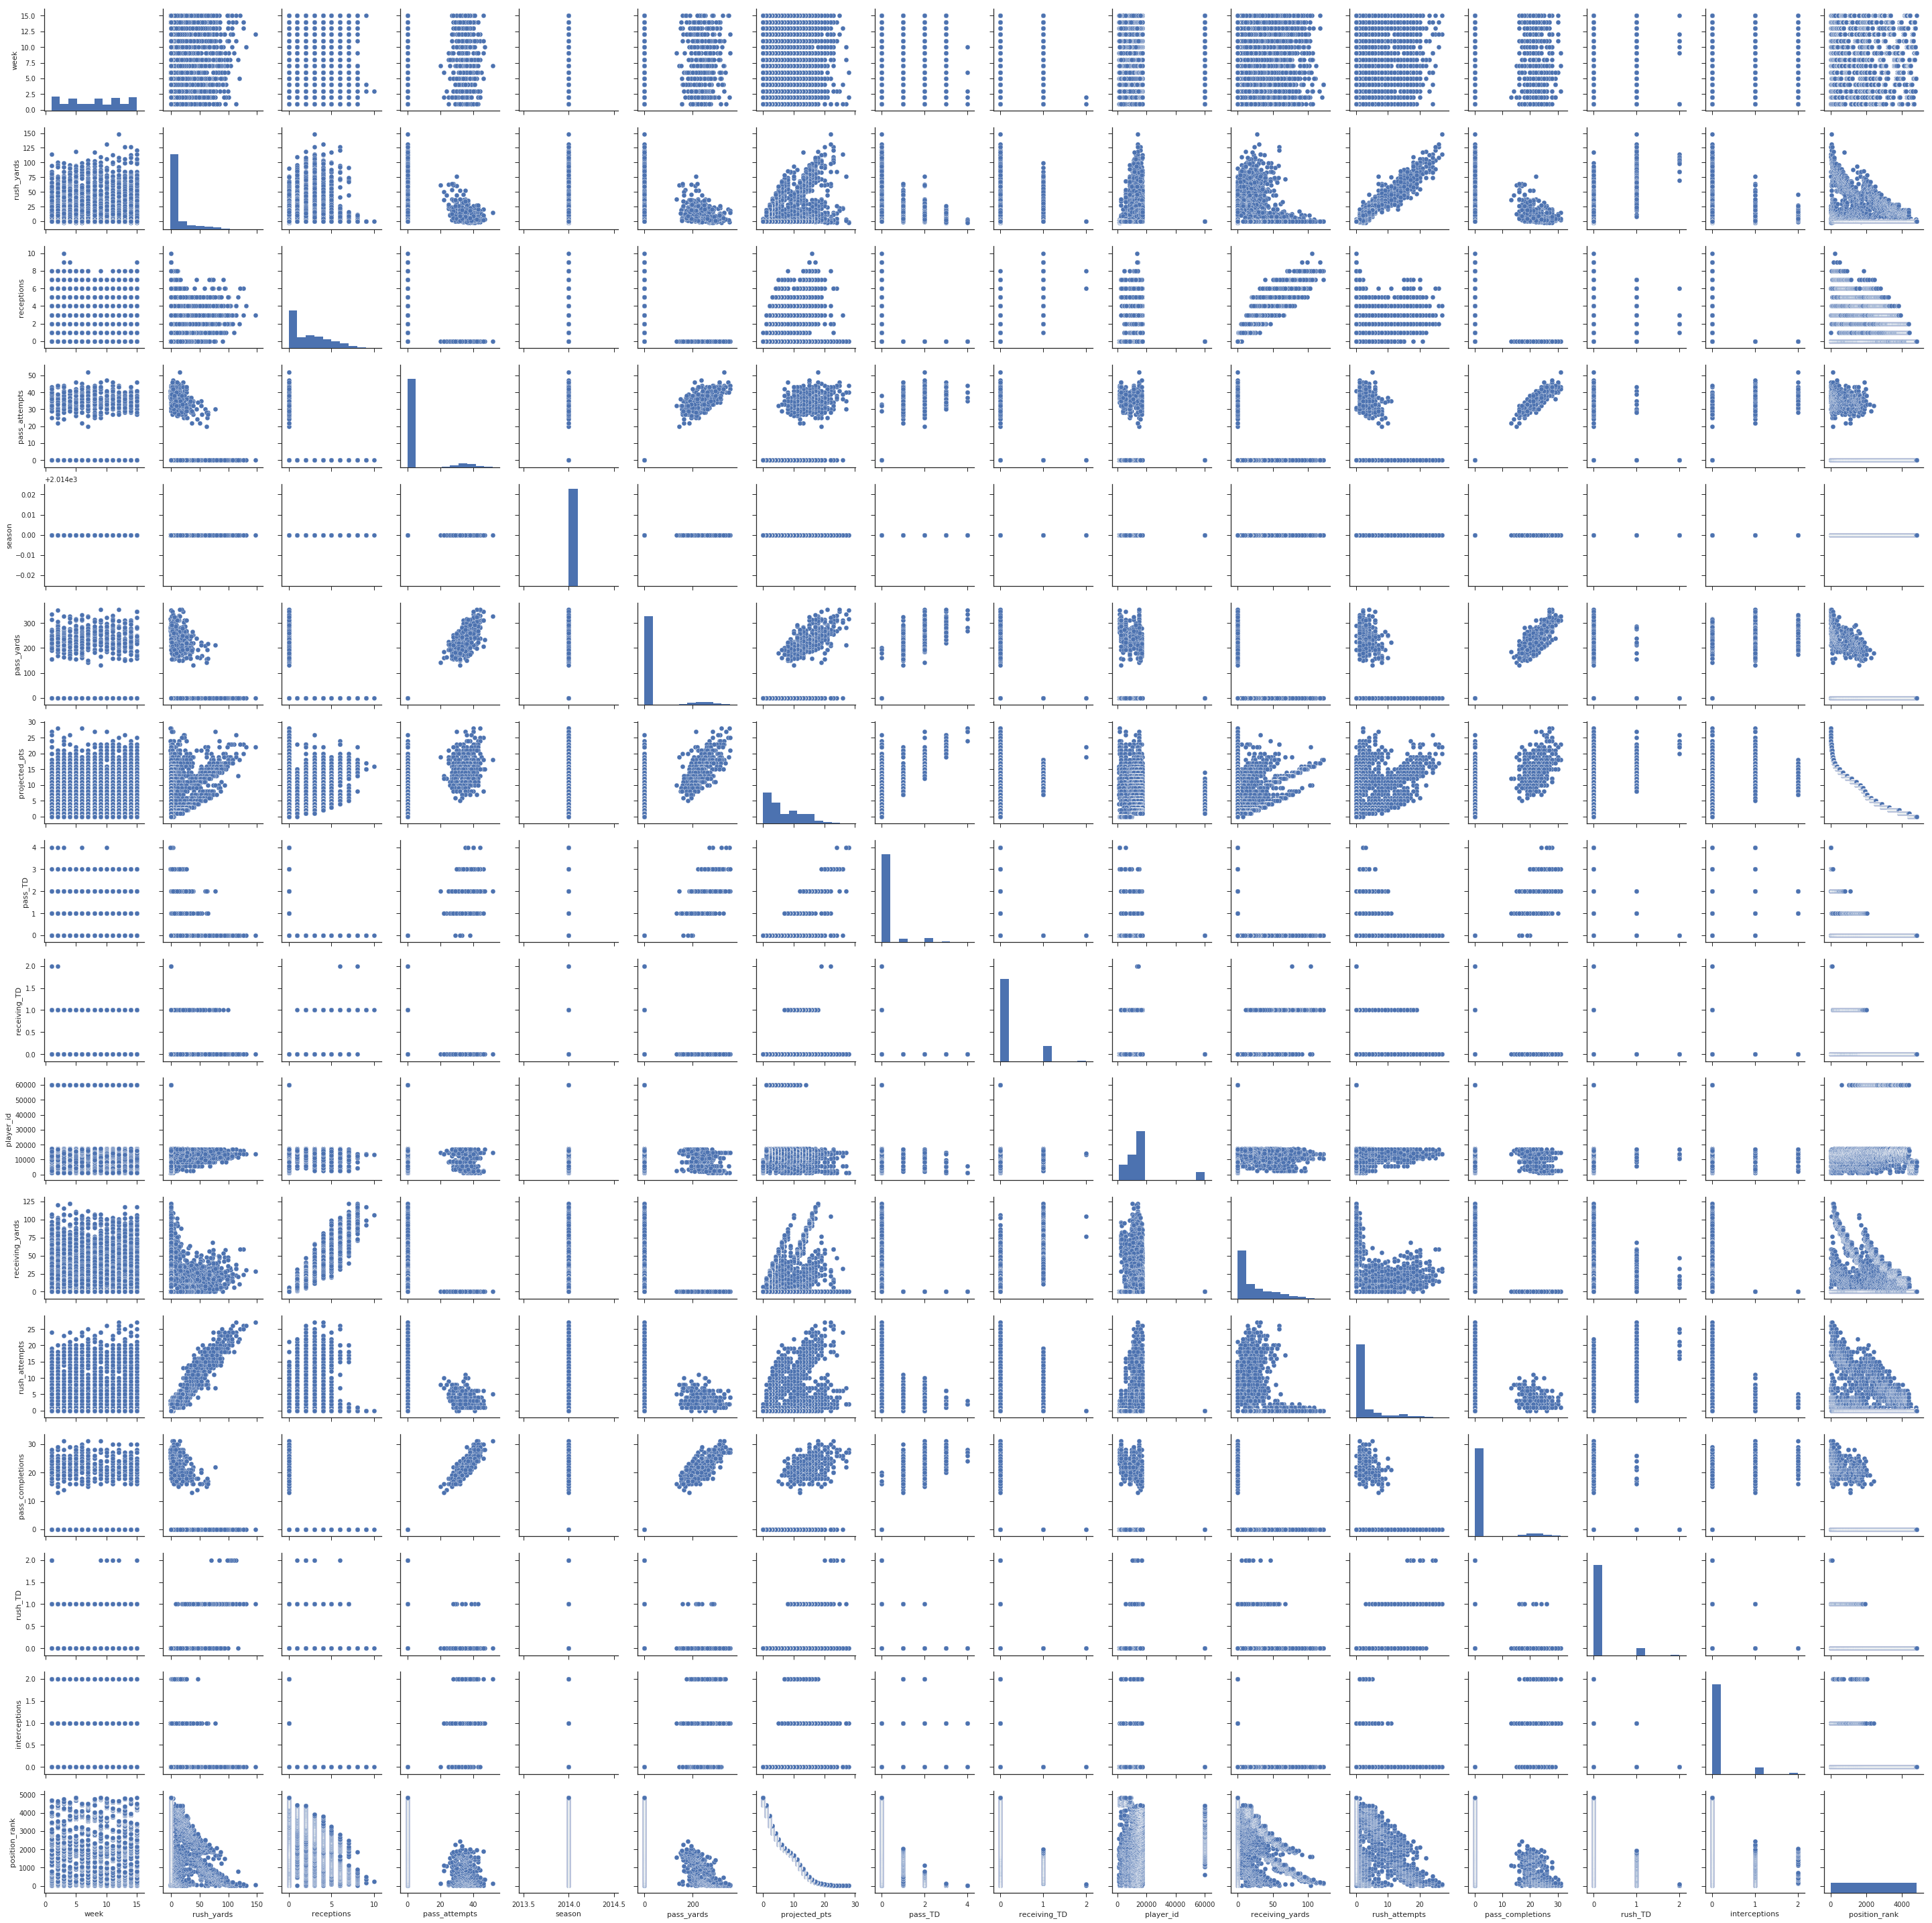

In [57]:
sns.set(style="ticks")
sns.pairplot(df)

In [60]:
def get_ci(data, alpha=0.05):
    """Return confidence intervals"""
    alpha = alpha * 100 # np.percentile wants ints between 0, 100; not floats
    lower, upper = (alpha/2), 100 - (alpha/2)
    return np.percentile(data, [lower, upper])

def histogram(data, filename, small=False, title='', titlesize=22, bins=25, figsize=(13,5), xlim=None, xlabel='', xsize=22, ylabel=''):
    fig = plt.figure(figsize=figsize)
    axes = fig.add_subplot(111)
    [item.set_fontsize(xsize) for item in axes.get_xticklabels()]
    axes.xaxis.set_major_locator(MaxNLocator(symmetric=True))
    axes.locator_params(nbins=7)
    if small:
        axes.locator_params(nbins=5)
    plt.title(title, fontdict={'fontsize': titlesize})
    r = sns.distplot(data, color='#ff6000', bins=bins, kde=False)
    r.set_xlabel(xlabel)
    r.set_ylabel(ylabel)
    r.set_xlim(xlim)
    r.set_yticklabels('')
    r.axvline(x=0, ls=':', color='k', linewidth=1.5)
    r.spines['top'].set_visible(False)
    r.spines['left'].set_visible(False)
    r.spines['right'].set_visible(False)
    plt.savefig(filename, bbox_inches='tight')

In [64]:
histogram(
    data=espn.point_diff,
    filename='charts/histogram-absolute-error-all-players.png',
    title='Absolute Error - All Players')

NameError: name 'espn' is not defined